In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import datetime

%matplotlib inline

A function called to build each model where each layer is added sequentially. 

Dense layers indicate a fully connected layer of nodes. Dropout layers are used for regularisation where nodes are randomly excluded from the model at a set rate. When each model.add class is called, a new layer is appended to the end of the model.

Within the Dense class I've used the following terms:
Units, the number of nodes in each layer
input_shape, used in the first layer only to specify the size of the input layer
kernel_initializer, initialises the layer weights according to a specific initialiser function
activation, the activation function of each layer
kernel_regularizer, a regularisation penalty applied to the layer weights

During the model's compilation the loss function is specified along with the optimiser function and the performance metrics to be tracked. 

I am using the default Adam parameters (beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) with the exception of a learning rate of 0.01 rather than the default 0.001. This is because when I attempted automated hyperparameter tuning a learning rate of 0.01 was consistently chosen over the default and this best performing model was developed with a learning rate of 0.01.

In [27]:
def Build_model():
    
    model = keras.Sequential()
    
    model.add(layers.Dense(15, input_shape=[len(df_train_set.keys()),], kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(128, activation='selu', kernel_initializer=tf.keras.initializers.LecunNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(layers.Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse'])
    
    return model

In [28]:
dataset = pd.read_csv('complete_dataset_with_SF2.csv') # loading the final dataset
dataset.drop('Unnamed: 0', 1, inplace=True) #removing additional index column found in the file

In [29]:
dataset.dropna(inplace=True) #removes the NaN values

Here I am using one-hot encoding to turn categorical data into individual fields with a value of 1 or 0

In [30]:
Cell_line = dataset.pop("Cell Line") #removing the cell line and dose rate and saving them in seperate series
Dose_Rate = dataset.pop("Dose Rate")
dataset['FIB10'] = (Cell_line=='FIB10') * 1 #creates a new column in the dataset with the cell line's name. Checks against the cell line series and if the value is the same as the one specified then a 1 is placed in that row.
dataset['Fib34(a)'] = (Cell_line=='Fib34(a)') * 1
dataset['Fib34(b)'] = (Cell_line=='Fib34(b)') * 1
dataset['Fib34(c)'] = (Cell_line=='Fib34(c)') * 1
dataset['Fib31'] = (Cell_line=='Fib31') * 1
dataset['FAN1'] = (Cell_line=='FAN1') * 1
dataset['FAN2'] = (Cell_line=='FAN2') * 1
dataset['G36'] = (Cell_line=='G36') * 1
dataset['EBF'] = (Cell_line=='EBF') * 1
dataset['HF4 p4.1'] = (Cell_line=='HF4 p4.1') * 1
dataset['HF491'] = (Cell_line=='HF491') * 1
dataset['HF691'] = (Cell_line=='HF691') * 1
dataset['HDR'] = (Dose_Rate=='HDR') * 1
dataset['LDR'] = (Dose_Rate=='LDR') * 1
dataset.describe() #provides a description of the data

,Dose,#Plated,PE,#Counted,SF,FIB10,Fib34(a),Fib34(b),Fib34(c),Fib31,FAN1,FAN2,G36,EBF,HF4 p4.1,HF491,HF691,HDR,LDR
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,3.656694,6818.599349,0.308036,34.537459,0.275306,0.173453,0.223941,0.122150,0.087948,0.085505,0.026873,0.105049,0.051303,0.038274,0.024430,0.024430,0.036645,0.621336,0.378664
std,2.768387,8048.874482,0.173732,28.157597,0.389201,0.378792,0.417053,0.327592,0.283334,0.279745,0.161778,0.306741,0.220705,0.191934,0.154443,0.154443,0.187965,0.485252,0.485252
min,0.000000,100.000000,0.040800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,500.000000,0.205000,10.000000,0.004882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.110000,2000.000000,0.310000,28.000000,0.068395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,10000.000000,0.412000,53.000000,0.447917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10.900000,20000.000000,0.710000,124.000000,1.775457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Generating the testing and training datasets

In [6]:
trial_dataset = dataset.drop(['#Plated','PE','#Counted'], axis=1) #removes these columns as they won't be used by the model
df_train_set = trial_dataset.sample(frac=0.8, random_state=0) #creates an 80 20 split of the data with a random state set so i can ensure each test runs with the same values
df_test_set = trial_dataset.drop(df_train_set.index)

In [7]:
train_labels = df_train_set.pop('SF') #removing the labels column
test_labels = df_test_set.pop('SF')

train_labels = train_labels.to_numpy() #producing numpy arrays and reshaping them
test_labels = test_labels.to_numpy()
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)
len(df_train_set.keys()) #shows the number of input parameters to the model

15

Normalising the data with scikit learn's MinMaxScaler

In [8]:
scaler = MinMaxScaler()
train_set_norm = scaler.fit_transform(df_train_set)
test_set_norm = scaler.fit_transform(df_test_set)
train_labels_norm = scaler.fit_transform(train_labels)
test_labels_norm = scaler.fit_transform(test_labels)

Building the initial model

In [20]:
model = Build_model() #Builds the model according the the function Build_model
history = model.fit(train_set_norm, train_labels_norm, epochs=200, verbose=0) #Saves the training information to history. The training x and y values are passed, eopchs is the number of times the model will run through during training, verbose=0 stops the fit function reporting the results each time
results = model.evaluate(test_set_norm, test_labels_norm) #tests the trained model on the unseen testing set and gives its performance

8/8 [==============================] - 0s 873us/step - loss: 0.0217 - mae: 0.0610 - mse: 0.0138


In [10]:
current_best = results[-1] #stores the current best MSE value achieved on the test set
current_best

0.020031342282891273

Here I will train 1000 models to find the best performing one due to random changes in the weight initialisations the can lead to identical models having different performances

In [11]:
def retrain():
    
    Build_model() #Builds the model
    history = model.fit(train_set_norm, train_labels_norm, epochs=200, verbose=0) #Trains the model and saves the training history

8/8 [==============================] - 0s 748us/step - loss: 0.0196 - mae: 0.0571 - mse: 0.0114
0.011380081064999104
INFO:tensorflow:Assets written to: Current_best_model_full_dataset\assets


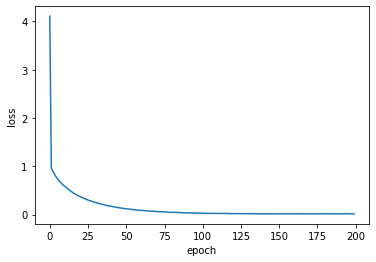

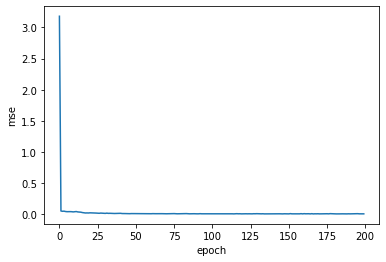

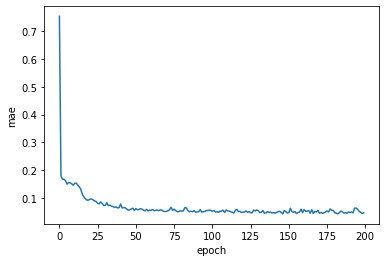

8/8 [==============================] - 0s 748us/step - loss: 0.0171 - mae: 0.0554 - mse: 0.0090
0.00903339870274067
INFO:tensorflow:Assets written to: Current_best_model_full_dataset\assets


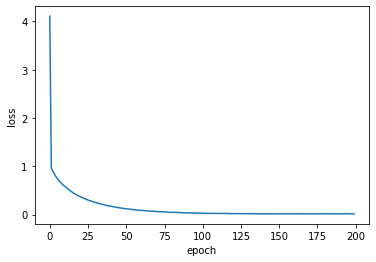

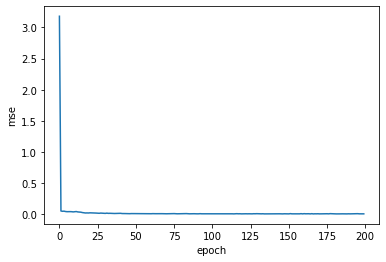

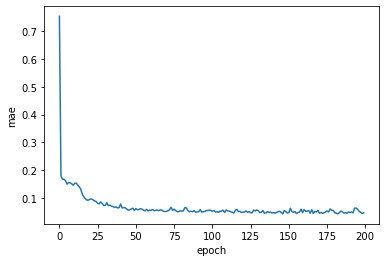

8/8 [==============================] - 0s 876us/step - loss: 0.0229 - mae: 0.0686 - mse: 0.0147
10
8/8 [==============================] - 0s 997us/step - loss: 0.0228 - mae: 0.0670 - mse: 0.0144
20
8/8 [==============================] - 0s 873us/step - loss: 0.0226 - mae: 0.0668 - mse: 0.0147
30
8/8 [==============================] - 0s 748us/step - loss: 0.0206 - mae: 0.0586 - mse: 0.0125
40
8/8 [==============================] - 0s 748us/step - loss: 0.0231 - mae: 0.0710 - mse: 0.0146
50
8/8 [==============================] - 0s 748us/step - loss: 0.0168 - mae: 0.0525 - mse: 0.0083
0.008295000530779362
INFO:tensorflow:Assets written to: Current_best_model_full_dataset\assets


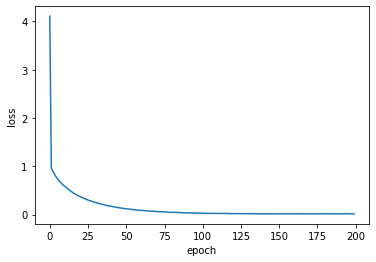

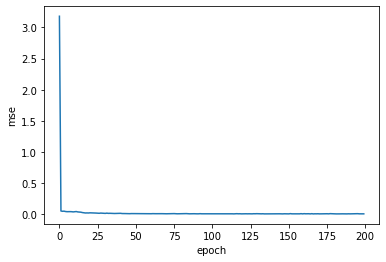

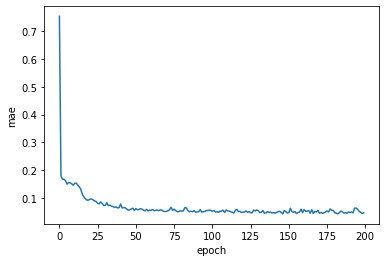

8/8 [==============================] - 0s 748us/step - loss: 0.0226 - mae: 0.0654 - mse: 0.0143
60
8/8 [==============================] - 0s 873us/step - loss: 0.0235 - mae: 0.0713 - mse: 0.0155
70
8/8 [==============================] - 0s 748us/step - loss: 0.0196 - mae: 0.0596 - mse: 0.0116
80
8/8 [==============================] - 0s 997us/step - loss: 0.0299 - mae: 0.0864 - mse: 0.0210
90
8/8 [==============================] - 0s 997us/step - loss: 0.0198 - mae: 0.0582 - mse: 0.0117
100
8/8 [==============================] - 0s 748us/step - loss: 0.0267 - mae: 0.0765 - mse: 0.0189
110
8/8 [==============================] - 0s 873us/step - loss: 0.0233 - mae: 0.0703 - mse: 0.0152
120
8/8 [==============================] - 0s 874us/step - loss: 0.0270 - mae: 0.0780 - mse: 0.0188
130
8/8 [==============================] - 0s 997us/step - loss: 0.0204 - mae: 0.0588 - mse: 0.0117
140
8/8 [==============================] - 0s 873us/step - loss: 0.0219 - mae: 0.0620 - mse: 0.0137
150
8/8 

8/8 [==============================] - 0s 748us/step - loss: 0.0235 - mae: 0.0704 - mse: 0.0149
180
8/8 [==============================] - 0s 986us/step - loss: 0.0218 - mae: 0.0659 - mse: 0.0137
190
8/8 [==============================] - 0s 997us/step - loss: 0.0251 - mae: 0.0723 - mse: 0.0168
200
8/8 [==============================] - 0s 748us/step - loss: 0.0184 - mae: 0.0577 - mse: 0.0097
210
8/8 [==============================] - 0s 873us/step - loss: 0.0261 - mae: 0.0791 - mse: 0.0175
220
8/8 [==============================] - 0s 997us/step - loss: 0.0195 - mae: 0.0606 - mse: 0.0109
230
8/8 [==============================] - 0s 748us/step - loss: 0.0190 - mae: 0.0542 - mse: 0.0110
240
8/8 [==============================] - 0s 817us/step - loss: 0.0200 - mae: 0.0638 - mse: 0.0117
250
8/8 [==============================] - 0s 873us/step - loss: 0.0185 - mae: 0.0573 - mse: 0.0106
260
8/8 [==============================] - 0s 873us/step - loss: 0.0224 - mae: 0.0703 - mse: 0.0139
270


8/8 [==============================] - 0s 997us/step - loss: 0.0219 - mae: 0.0623 - mse: 0.0137
320
8/8 [==============================] - 0s 873us/step - loss: 0.0257 - mae: 0.0753 - mse: 0.0176
330
8/8 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.0567 - mse: 0.0105
340
8/8 [==============================] - 0s 873us/step - loss: 0.0187 - mae: 0.0579 - mse: 0.0105
350
8/8 [==============================] - 0s 873us/step - loss: 0.0206 - mae: 0.0611 - mse: 0.0125
360
8/8 [==============================] - 0s 873us/step - loss: 0.0273 - mae: 0.0809 - mse: 0.0183
370
8/8 [==============================] - 0s 873us/step - loss: 0.0270 - mae: 0.0791 - mse: 0.0189
380
8/8 [==============================] - 0s 996us/step - loss: 0.0215 - mae: 0.0643 - mse: 0.0135
390
8/8 [==============================] - 0s 997us/step - loss: 0.0228 - mae: 0.0672 - mse: 0.0139
400
8/8 [==============================] - 0s 873us/step - loss: 0.0205 - mae: 0.0587 - mse: 0.0122
410
8/

8/8 [==============================] - 0s 997us/step - loss: 0.0219 - mae: 0.0633 - mse: 0.0140
470
8/8 [==============================] - 0s 1ms/step - loss: 0.0184 - mae: 0.0541 - mse: 0.0102
480
8/8 [==============================] - 0s 997us/step - loss: 0.0220 - mae: 0.0659 - mse: 0.0140
490
8/8 [==============================] - 0s 1ms/step - loss: 0.0341 - mae: 0.0943 - mse: 0.0256
500
8/8 [==============================] - 0s 1ms/step - loss: 0.0264 - mae: 0.0794 - mse: 0.0182
510
8/8 [==============================] - 0s 996us/step - loss: 0.0161 - mae: 0.0487 - mse: 0.0078
0.007761975284665823
INFO:tensorflow:Assets written to: Current_best_model_full_dataset\assets


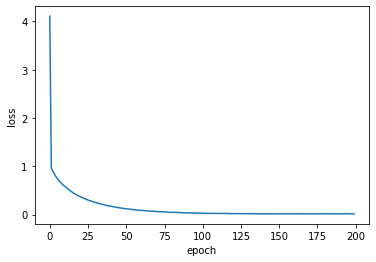

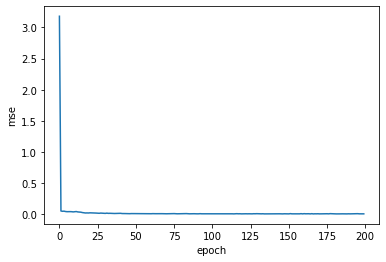

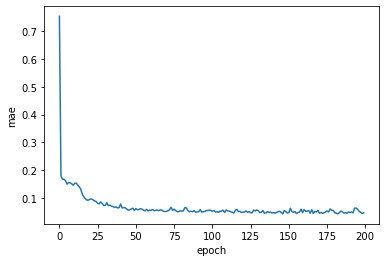

8/8 [==============================] - 0s 1ms/step - loss: 0.0161 - mae: 0.0487 - mse: 0.0078
520
8/8 [==============================] - 0s 1ms/step - loss: 0.0206 - mae: 0.0607 - mse: 0.0127
530
8/8 [==============================] - 0s 1ms/step - loss: 0.0237 - mae: 0.0695 - mse: 0.0153
540
8/8 [==============================] - 0s 1ms/step - loss: 0.0245 - mae: 0.0722 - mse: 0.0166
550
8/8 [==============================] - 0s 1ms/step - loss: 0.0191 - mae: 0.0575 - mse: 0.0108
560
8/8 [==============================] - 0s 873us/step - loss: 0.0214 - mae: 0.0628 - mse: 0.0135
570
8/8 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.0659 - mse: 0.0153
580
8/8 [==============================] - 0s 1ms/step - loss: 0.0236 - mae: 0.0678 - mse: 0.0153
590
8/8 [==============================] - 0s 997us/step - loss: 0.0188 - mae: 0.0546 - mse: 0.0107
600
8/8 [==============================] - 0s 1ms/step - loss: 0.0344 - mae: 0.0974 - mse: 0.0258
610
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.0291 - mae: 0.0803 - mse: 0.0201
700
8/8 [==============================] - 0s 1ms/step - loss: 0.0251 - mae: 0.0734 - mse: 0.0172
710
8/8 [==============================] - 0s 1ms/step - loss: 0.0263 - mae: 0.0790 - mse: 0.0182
720
8/8 [==============================] - 0s 1ms/step - loss: 0.0176 - mae: 0.0551 - mse: 0.0097
730
8/8 [==============================] - 0s 1ms/step - loss: 0.0265 - mae: 0.0774 - mse: 0.0184
740
8/8 [==============================] - 0s 1ms/step - loss: 0.0234 - mae: 0.0702 - mse: 0.0153
750
8/8 [==============================] - 0s 997us/step - loss: 0.0218 - mae: 0.0609 - mse: 0.0137
760
8/8 [==============================] - 0s 1ms/step - loss: 0.0169 - mae: 0.0522 - mse: 0.0086
770
8/8 [==============================] - 0s 1ms/step - loss: 0.0222 - mae: 0.0686 - mse: 0.0138
780
8/8 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.0629 - mse: 0.0129
790
8/8 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.0309 - mae: 0.0885 - mse: 0.0221
870
8/8 [==============================] - 0s 1ms/step - loss: 0.0261 - mae: 0.0786 - mse: 0.0177
880
8/8 [==============================] - 0s 1ms/step - loss: 0.0267 - mae: 0.0808 - mse: 0.0185
890
8/8 [==============================] - 0s 1ms/step - loss: 0.0227 - mae: 0.0683 - mse: 0.0147
900
8/8 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.0696 - mse: 0.0150
910
8/8 [==============================] - 0s 1ms/step - loss: 0.0176 - mae: 0.0539 - mse: 0.0092
920
8/8 [==============================] - 0s 1ms/step - loss: 0.0197 - mae: 0.0566 - mse: 0.0118
930
8/8 [==============================] - 0s 1ms/step - loss: 0.0193 - mae: 0.0570 - mse: 0.0111
940
8/8 [==============================] - 0s 1ms/step - loss: 0.0203 - mae: 0.0622 - mse: 0.0121
950
8/8 [==============================] - 0s 1ms/step - loss: 0.0342 - mae: 0.0924 - mse: 0.0256
960
8/8 [===============

In [15]:
for i in range(1, 1000, 1):
    
    results = model.evaluate(test_set_norm, test_labels_norm) #Gets the results of the current model build
    
    if results[-1] < current_best: #if the MSE of the current value is less than the current best value
        
        current_best = results[-1] #update current best to new value
        print(current_best) #output new value
        model.save('Current_best_model_full_dataset', overwrite=True) #save the model, overwite old model
        
        plt.plot(history.history['loss']) #output graphs of the models loss, mse and mae
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()
        
        plt.plot(history.history['mse'])
        plt.ylabel('mse')
        plt.xlabel('epoch')
        plt.show()
        
        plt.plot(history.history['mae'])
        plt.ylabel('mae')
        plt.xlabel('epoch')
        plt.show()
        
    else: #if the current model isnt better than the current best model, retrain the model
        
        retrain()
        
    if i % 10 == 0: #prints out every 10th run through to keep track of progress
        print(i)

In [16]:
current_best # outputs final best

0.007761975284665823

In [15]:
model = keras.models.load_model('Current_best_model_full_dataset') #loads the best model back into the model variable

MSE of the non-normalised data: 0.013799068069613634
R2: 0.9054764863840554


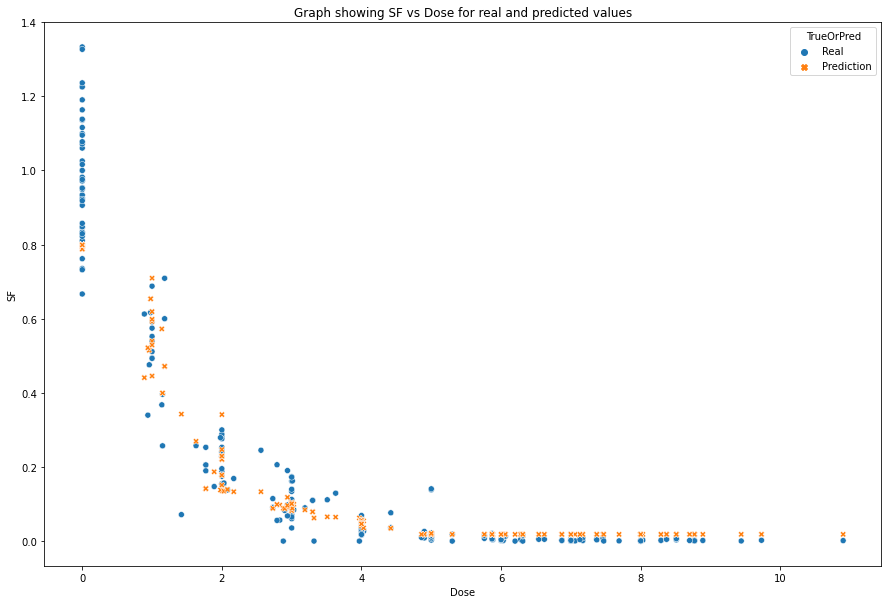

In [18]:
predictions = model.predict(test_set_norm) #gets the model to produce the predictions on the test set
true_pred = scaler.inverse_transform(predictions) #finds the real values of the model's predictions by performing the inverse of the normalisation function applied to the original labels

ss_res = ((test_labels-true_pred)**2).sum()
ss_tot = ((test_labels - true_pred.mean())**2).sum()
R2 = (1-(ss_res/ss_tot)) #generating the R-squared score

dose = df_test_set['Dose'] #Producing a comparison table where the real values are compared with the predictions
dose = pd.DataFrame(dose)
dose = dose.reset_index(drop=True)
comparison_table = dose
comparison_table['SF'] = test_labels
comparison_table['TrueOrPred'] = 'Real'

other = df_test_set['Dose']
other = pd.DataFrame(other)
other = other.reset_index(drop=True)
comparison_table_2 = other
comparison_table_2['SF'] = true_pred
comparison_table_2['TrueOrPred'] = 'Prediction'

final_comp = comparison_table.append(comparison_table_2)
final_comp.reset_index(inplace=True,drop=True)

graph = plt.gcf() #Draws a graph of the real values and the predictions
graph.set_size_inches(15,10)
graph = sns.scatterplot(x='Dose', y='SF', data=final_comp, hue='TrueOrPred', style='TrueOrPred').set(title='Graph showing SF vs Dose for real and predicted values')

mse = sklearn.metrics.mean_squared_error(test_labels, true_pred) #finds MSE of true predictions

print('MSE of the non-normalised data:', mse)
print('R2:', R2)

C:\Users\simon\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


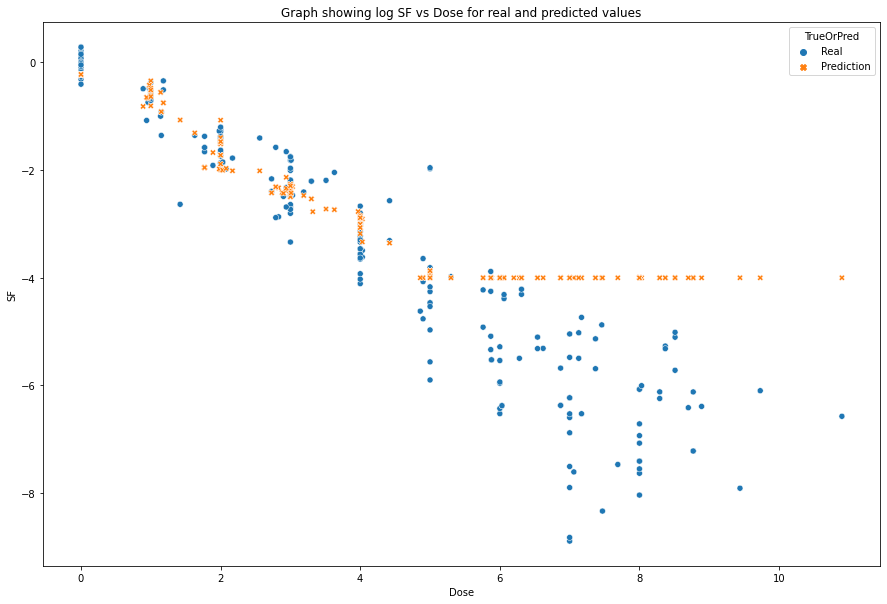

In [19]:
graph = plt.gcf() #Draws a graph of the real values and the predictions
graph.set_size_inches(15,10)
graph = sns.scatterplot(x='Dose', y=np.log(final_comp['SF']), data=final_comp, hue='TrueOrPred', style='TrueOrPred').set(title='Graph showing log SF vs Dose for real and predicted values')

In [20]:
results = model.evaluate(test_set_norm, test_labels_norm)

8/8 [==============================] - 0s 2ms/step - loss: 0.0161 - mean_absolute_error: 0.0487 - mean_squared_error: 0.0078


In [21]:
model.summary() #summary of the model architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1